# CUSTOMER CHURN PREDICTION
The aim of this task is to predict customer churn for a subscription based service or business

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, roc_auc_score,recall_score, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading, describing and filtering data

In [2]:
customer_churn = pd.read_csv(r"C:\Users\HP\Downloads\Churn_Modelling (1).csv") # loading the dataset into jupyter

customer_churn.head() # displays top 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
customer_churn.info() # Displays a concise summary of the customer_churn DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
customer_churn.describe() # Displays descriptive statistics of the numerical columns 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
customer_churn.describe(include="object") # Displays descriptive statistics for categorical columns 

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [6]:
customer_churn.isnull().sum() # Counts the number of missing values in each column

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
customer_churn.corr() # Computes the pairwise correlation of numerical columns 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [8]:
customer_churn["RowNumber"].unique() # Retrieves the unique values from the RowNumber column
len(customer_churn["RowNumber"].unique()) # Counts the number of unique Rows

10000

In [9]:
customer_churn["CustomerId"].unique() # Retrieves the unique values from the CustomerId column
len(customer_churn["CustomerId"].unique()) # Counts the number of unique Rows

10000

In [10]:
columns_to_remove = ["RowNumber","CustomerId","Surname"] # list of column names to be removed
customer_churn = customer_churn.drop(columns=columns_to_remove) # Removes specified columns from the customer_churn DataFrame

In [11]:
customer_churn.head() 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Preprocessing

In [12]:
# Defines the target variable for prediction
target_variable = ["Exited"]
# Defines categorical feature columns
cat_feats = ["Geography","Gender","IsActiveMember","HasCrCard"]
# Identifies numerical feature columns
num_feats = [col for col in customer_churn if col not in (cat_feats + target_variable)]

In [13]:
# number of customers that stayed and churned
num_retained = customer_churn[customer_churn.Exited == 0].shape[0]
num_churned = customer_churn[customer_churn.Exited == 1].shape[0]

# percentage of customers retained
print(num_retained/(num_churned+num_retained)*100,"percent of the customers remained")
# percentage of customers churned
percent_churned = num_churned/(num_churned+num_retained)*100
print(f"{percent_churned:.2f} percent of the customers churned")

79.63 percent of the customers remained
20.37 percent of the customers churned


<Axes: xlabel='Gender', ylabel='count'>

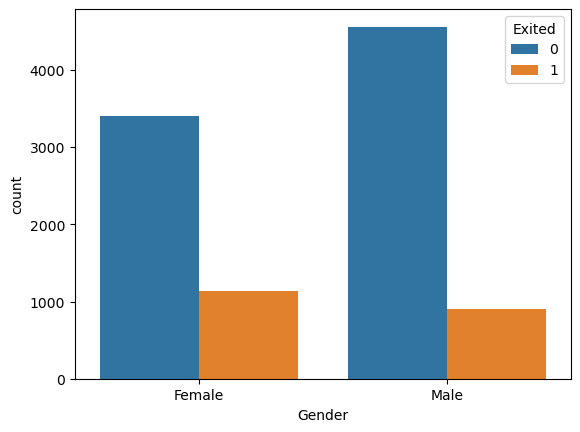

In [14]:
# Creates a count plot to visualize the distribution of customer gender with respect to whether they exited or not.
sns.countplot(x="Gender", hue="Exited", data = customer_churn)

<Axes: xlabel='Geography', ylabel='count'>

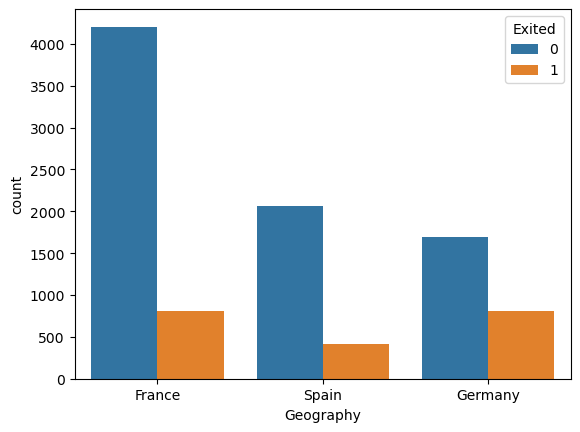

In [15]:
# Creates a count plot to visualize the distribution of customer geography with respect to whether they exited or not.
sns.countplot(x="Geography", hue="Exited", data = customer_churn)

<Axes: xlabel='HasCrCard', ylabel='count'>

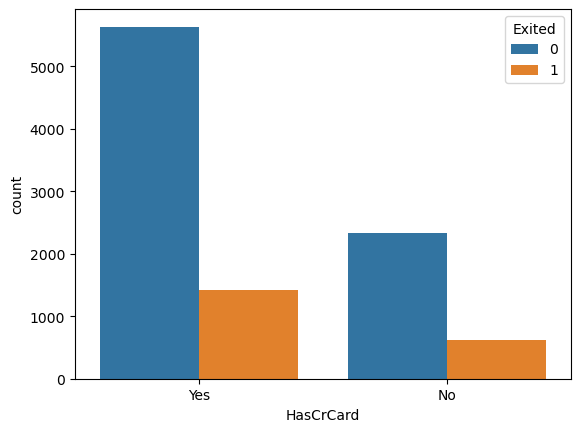

In [16]:
# Creates a count plot to visualize the distribution of customers based on their credit card status
sns.countplot(x=customer_churn['HasCrCard'].map({0: 'No', 1: 'Yes'}), hue="Exited", data = customer_churn)

<Axes: xlabel='IsActiveMember', ylabel='count'>

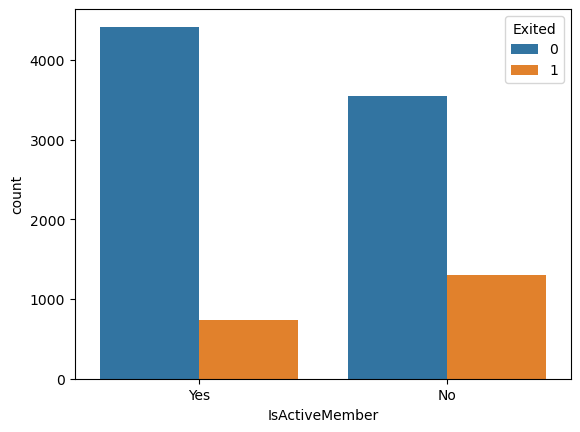

In [17]:
# Creates a count plot to visualize the distribution of customers based on their active membership status
sns.countplot(x=customer_churn['IsActiveMember'].map({0: 'No', 1: 'Yes'}), hue="Exited", data = customer_churn)

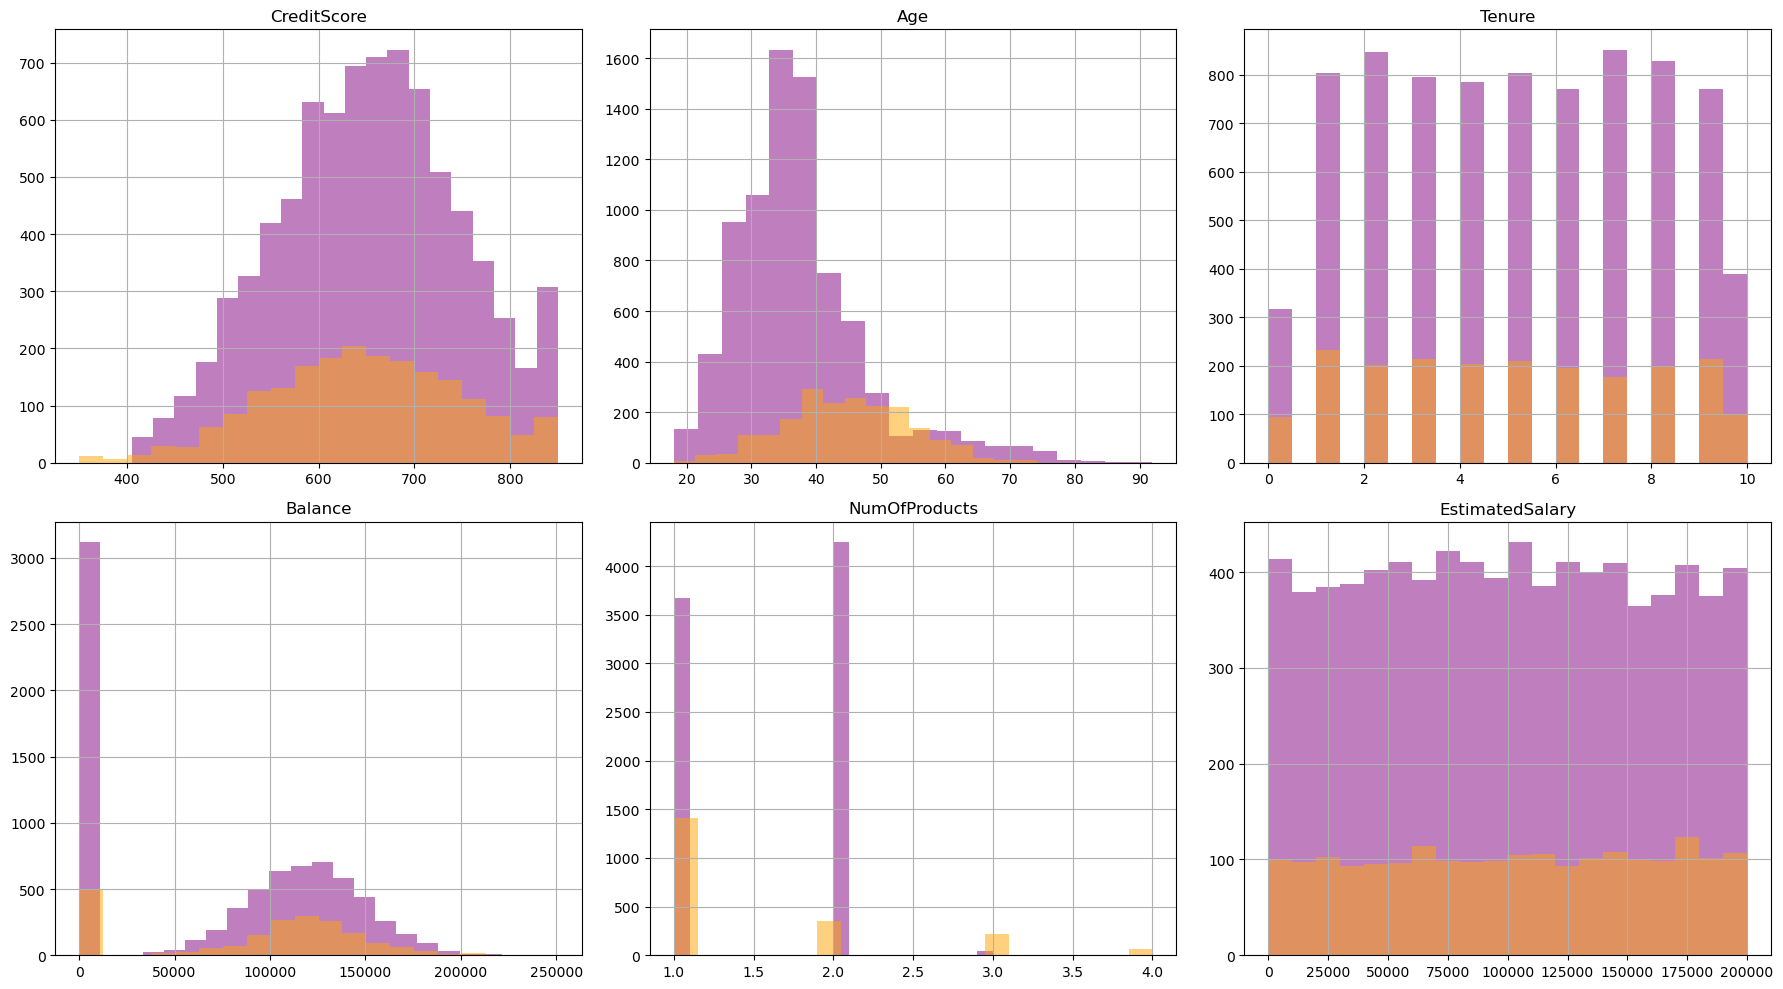

In [18]:
# Creates a figure with a 2x3 grid of subplots
fig, ax = plt.subplots(2, 3, figsize=(18,10))

# Flattens the ax array for easy indexing
ax = ax.flatten()

# Plots histograms for Exited == 0
customer_churn[customer_churn.Exited == 0][num_feats].hist(bins=20, color="purple", alpha=0.5, ax=ax[:len(num_feats)])

# Plots histograms for Exited == 1
customer_churn[customer_churn.Exited == 1][num_feats].hist(bins=20, color="orange", alpha=0.5, ax=ax[:len(num_feats)])

plt.tight_layout()
plt.show()


In [19]:
customer_churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Data Splitting

In [20]:
X = customer_churn.drop(columns="Exited", axis=1) # Creates a feature matrix X by dropping the target variable 'Exited' 
y = customer_churn["Exited"] # Defines the target variable y by selecting the 'Exited' column

In [21]:
# Splits the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [22]:
print("Columns in X_train:", X_train.columns)

Columns in X_train: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


## Data Transformation

In [23]:
# Defines the categorical features to be one-hot encoded
nominal_cat_feats = ["Gender", "Geography"]

# Initializes the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fits and transforms the training data for categorical features
nominal_mat_train = encoder.fit_transform(X_train[nominal_cat_feats])
nominal_churn_train = pd.DataFrame(nominal_mat_train, columns=encoder.get_feature_names_out(), index=X_train.index)

# Drops original categorical columns and add one-hot encoded columns to the training data
X_train = X_train.drop(columns=nominal_cat_feats)
X_train = pd.concat([X_train, nominal_churn_train], axis=1)

# Transforms the test data using the same encoder
nominal_mat_test = encoder.transform(X_test[nominal_cat_feats])
nominal_churn_test = pd.DataFrame(nominal_mat_test, columns=encoder.get_feature_names_out(), index=X_test.index)

# Drops original categorical columns and adds one-hot encoded columns to the test data
X_test = X_test.drop(columns=nominal_cat_feats)
X_test = pd.concat([X_test, nominal_churn_test], axis=1)

In [24]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Fits the scaler on the training and test data
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [25]:
# Initializes the Synthetic Minority Over-sampling Technique
sm = SMOTE(sampling_strategy="auto",random_state=1,k_neighbors=5)
# Applies SMOTE to the scaled training data to balance the class distribution
X_res, y_res = sm.fit_resample(X_train_sc,y_train)

## Model Training

In [26]:
# Initializes the RandomForestClassifier with a fixed random state for reproducibility
model = RandomForestClassifier(random_state=2)

# Trains the model using the resampled training data
model.fit(X_res, y_res)

# Predicts the target variable on the scaled test data
y_pred = model.predict(X_test_sc)

## Model Evaluation

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.62      0.62       407

    accuracy                           0.84      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000



In [28]:
# Calculates precision, recall, F1 score, ROC AUC,and PR AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall_vals, precision_vals)
print("Accuracy score:",accuracy_score(y_test,y_pred))
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"PR AUC: {pr_auc:.2f}")

Accuracy score: 0.843
Precision: 0.61
Recall: 0.62
F1 Score: 0.62
ROC AUC: 0.76
PR AUC: 0.65


In [29]:
predlist = list(zip(y_pred,y_test))
predlist

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 

In [30]:
conf_matrix =confusion_matrix(y_test,y_pred)
conf_matrix

array([[1435,  158],
       [ 156,  251]], dtype=int64)

## Metrics Visualizations

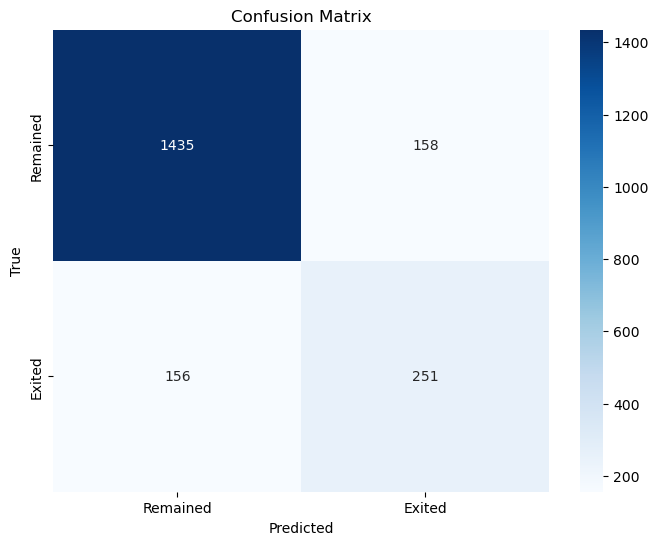

In [31]:
# Creates a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Remained', 'Exited'], yticklabels=['Remained', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

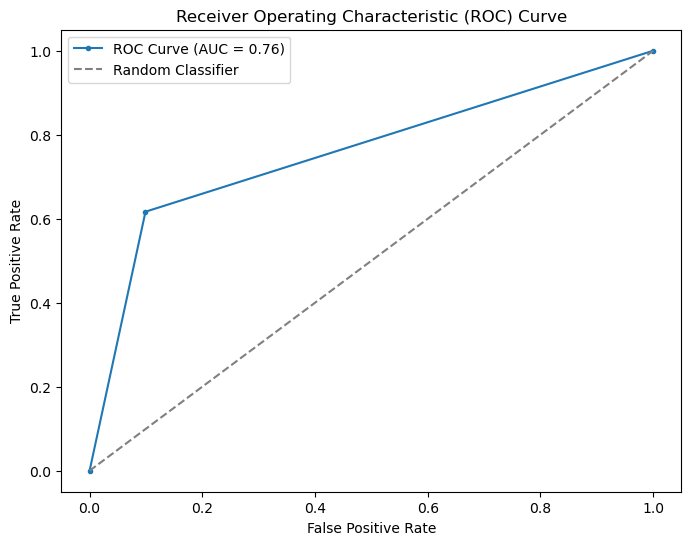

In [32]:
# Plots the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--',color='grey', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()